In [1449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

We start by exploring the raw data to assess the quality of the data set

In [1450]:
raw_data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

raw_data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [1451]:
raw_data.shape

(3376, 46)

In [1452]:
raw_data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [1453]:
raw_data.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [1454]:
raw_data.select_dtypes(include=["object", "bool"])

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,DefaultData,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,False,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,False,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,False,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,1624049080,GREATER DUWAMISH,Office,Office,NaN,NaN,NaN,True,Error - Correct Default Data,NaN
3372,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,3558300000,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,NaN,False,Compliant,NaN
3373,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,1794501150,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,NaN,False,Compliant,NaN
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,7883603155,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,NaN,False,Compliant,NaN


In [1455]:
raw_data["PrimaryPropertyType"]

0                    Hotel
1                    Hotel
2                    Hotel
3                    Hotel
4                    Hotel
               ...        
3371                Office
3372                 Other
3373                 Other
3374    Mixed Use Property
3375    Mixed Use Property
Name: PrimaryPropertyType, Length: 3376, dtype: object

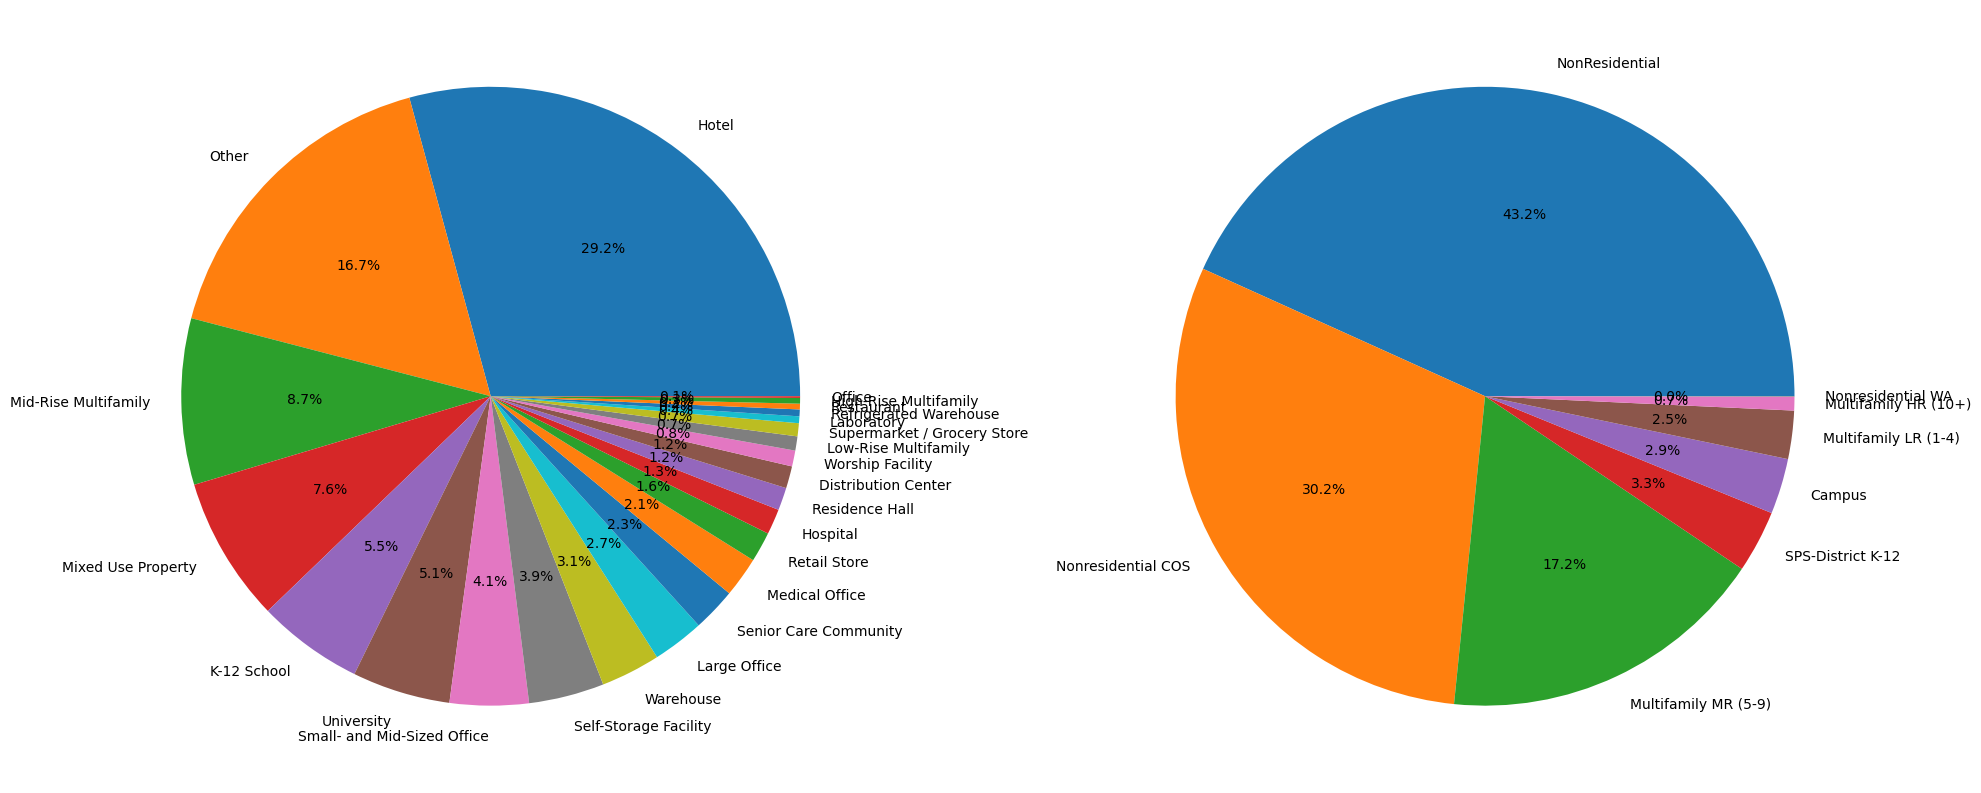

In [1456]:
fig, ax = plt.subplots(1, 2, figsize=[20, 35])
ax[0].pie(
    raw_data["PrimaryPropertyType"].value_counts(),
    labels=raw_data["PrimaryPropertyType"].unique(),
    autopct="%1.1f%%",
)
ax[1].pie(
    raw_data["BuildingType"].value_counts(),
    labels=raw_data["BuildingType"].unique(),
    autopct="%1.1f%%",
)
plt.tight_layout()
plt.show()

All columns seem to have the expected type, except maybe for YearsENERGYSTARCertified 

In [1457]:
raw_data["YearsENERGYSTARCertified"].unique()

array([nan, '2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2014201320112010200920082007', '2016201520142013',
       '2017201620152014201320112008', '201720162015201420132008',
       '20162015201320122010', '2015201320122010', '20162011201020092008',
       '2007', '2010', '20172016201520092008', '2017201320092008', '2015',
       '2017', '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '20

YearsENERGYSTARCertified contains a concatenated list of years as opposed to a number of years so the type makes sense but the values would need to be cleaned to be exploitable. 

In [1458]:
raw_data.select_dtypes(exclude=["object", "bool"])

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,98101.0,7,47.61220,-122.33799,1927,1.0,12,88434,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,NaN,249.98,2.83
1,2,2016,98101.0,7,47.61317,-122.33393,1996,1.0,11,103566,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,NaN,295.86,2.86
2,3,2016,98101.0,7,47.61393,-122.33810,1969,1.0,41,956110,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,NaN,2089.28,2.19
3,5,2016,98101.0,7,47.61412,-122.33664,1926,1.0,10,61320,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,NaN,286.43,4.67
4,8,2016,98121.0,7,47.61375,-122.34047,1980,1.0,18,175580,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,NaN,2,47.56722,-122.31154,1990,1.0,1,12294,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,NaN,20.94,1.70
3372,50223,2016,NaN,2,47.59625,-122.32283,2004,1.0,1,16000,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,NaN,32.17,2.01
3373,50224,2016,NaN,7,47.63644,-122.35784,1974,1.0,1,13157,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,NaN,223.54,16.99
3374,50225,2016,NaN,1,47.52832,-122.32431,1989,1.0,1,14101,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,NaN,22.11,1.57


In [1459]:
raw_data.isna().mean().mean()

0.12847723057902327

<Axes: >

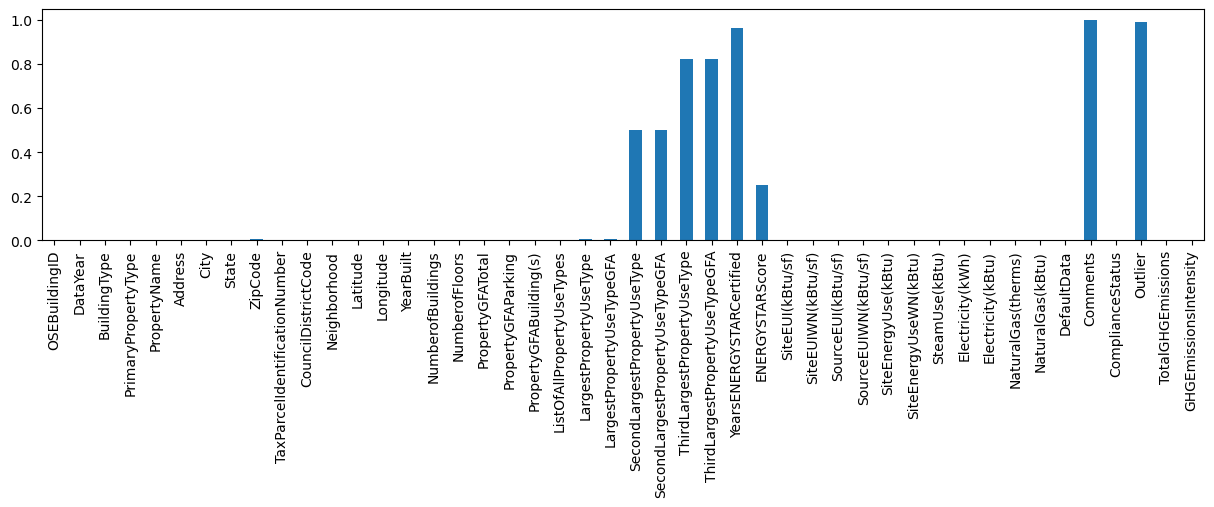

In [1460]:
plt.figure(figsize=[15, 3])
raw_data.isna().mean().plot(kind="bar")

The first look at the data set shows that it's quite small and contains good quality data. The types are coherent and the 12% of missing data seems to be justified since they only concern features where the value can be null.

The data description does however seem to highlight a few outliers in some columns. 

---

## Cleaning

We will start by removing the features that will not be usefull for the later analyses

In [1461]:
raw_data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [1462]:
data = raw_data.drop(
    columns=[
        "DataYear",
        "CouncilDistrictCode",
        "ZipCode",
        "Address",
        "City",
        "State",
        "TaxParcelIdentificationNumber",
        "Comments",
        "DefaultData",
    ]
)

data

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,...,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,...,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,...,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,...,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,...,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,...,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,...,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,...,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,...,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,NaN,22.11,1.57


In [1463]:
data.loc[data["OSEBuildingID"].duplicated()]

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [1464]:
data = data.drop(columns=["OSEBuildingID"])

In [1465]:
data["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [1466]:
non_compliant_buildings = data.loc[
    data["ComplianceStatus"].isin(["Missing Data", "Non-Compliant"])
]
non_compliant_buildings

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
28,SPS-District K-12,K-12 School,Meany Building,Central,47.62266,-122.30547,1955,1.0,1,126351,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,Missing Data,NaN,0.00,0.00
31,SPS-District K-12,K-12 School,John Hay Elementary,MAGNOLIA / QUEEN ANNE,47.63290,-122.35172,1989,1.0,2,51582,...,0.000000e+00,0.0,4.386917e+05,1496816.0,0.000000,0.0,Missing Data,NaN,10.43,0.20
62,SPS-District K-12,K-12 School,Arbor Heights Elementary,SOUTHWEST,47.50970,-122.37759,1948,1.0,2,53352,...,0.000000e+00,0.0,1.760881e+05,600813.0,0.000000,0.0,Missing Data,NaN,4.19,0.08
81,SPS-District K-12,K-12 School,Pathfinder K-8,DELRIDGE,47.56360,-122.35800,1999,1.0,3,74468,...,0.000000e+00,0.0,4.977068e+05,1698176.0,0.000000,0.0,Missing Data,NaN,11.84,0.16
85,SPS-District K-12,K-12 School,John Muir Elementary,SOUTHEAST,47.57324,-122.29058,1991,1.0,2,58933,...,0.000000e+00,0.0,6.879069e+05,2347138.0,0.000000,0.0,Missing Data,NaN,16.36,0.28
95,SPS-District K-12,K-12 School,B.F. Day Elementary,LAKE UNION,47.65464,-122.34912,1991,1.0,3,66588,...,0.000000e+00,0.0,6.167308e+05,2104286.0,0.000000,0.0,Missing Data,NaN,14.67,0.22
133,SPS-District K-12,K-12 School,Whitman Middle,BALLARD,47.69675,-122.37760,1959,1.0,1,160270,...,0.000000e+00,0.0,0.000000e+00,0.0,43189.171880,4318917.0,Missing Data,NaN,229.38,1.43
139,SPS-District K-12,K-12 School,Washington Middle,CENTRAL,47.59796,-122.30415,1963,1.0,3,136188,...,0.000000e+00,0.0,0.000000e+00,0.0,32178.773440,3217877.0,Missing Data,NaN,170.90,1.25
152,SPS-District K-12,K-12 School,Olympic View Elementary,NORTH,47.69823,-122.32126,1989,1.0,2,52792,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000,0.0,Missing Data,NaN,0.00,0.00
226,NonResidential,Large Office,Second And Spring Building,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,172842,...,4.165040e+07,0.0,1.166315e+07,39794668.0,16048.309570,1604831.0,Non-Compliant,High outlier,362.66,2.10


We will then remove the buildings that have been flagged as "Missing Data" or "Non-Compliant" since buildings with these statuses either contain missing data or are considered high or low outliers 

In [1467]:
data = data.drop(non_compliant_buildings.index)
data.drop(columns=["ComplianceStatus"])

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,NaN,249.98,2.83
1,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,NaN,295.86,2.86
2,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,NaN,2089.28,2.19
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,NaN,286.43,4.67
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,...,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,NaN,20.94,1.70
3372,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,NaN,32.17,2.01
3373,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,NaN,223.54,16.99
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,NaN,22.11,1.57


In [1468]:
data["Outlier"].unique()

array([nan, 'Low outlier'], dtype=object)

In [1469]:
outliers = data.loc[data["Outlier"].notna()]
outliers

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
839,SPS-District K-12,K-12 School,Queen Anne Gym,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,35805,...,431471.6875,0.0,72282.39844,246628.0,1848.439575,184844.0,Error - Correct Default Data,Low outlier,11.54,0.32
1045,NonResidential,Retail Store,Seattle Habitat Store,GREATER DUWAMISH,47.56535,-122.34054,1953,1.0,1,39900,...,145468.7969,0.0,14362.50000,49005.0,964.640015,96464.0,Error - Correct Default Data,Low outlier,5.46,0.14


We can remove the remainging buidlings that are condidered outliers

In [1470]:
data = data.drop(outliers.index)

In [1471]:
data.select_dtypes(exclude=["object", "bool"]).describe()

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3322.000000,3322.000000,3322.000000,3319.000000,3322.000000,3.322000e+03,3322.000000,3.322000e+03,3.307000e+03,1661.000000,...,3318.000000,3.322000e+03,3.321000e+03,3.318000e+03,3.318000e+03,3.318000e+03,3.318000e+03,3.318000e+03,3318.000000,3318.000000
mean,47.624126,-122.334734,1968.739314,1.106960,4.729681,9.503747e+04,8103.894943,8.693358e+04,7.922122e+04,28170.731666,...,138.447378,5.442533e+06,5.312764e+06,2.760277e+05,1.093280e+06,3.730272e+06,1.377761e+04,1.377761e+06,120.484075,1.178692
std,0.047755,0.027149,33.049142,2.122743,5.521011,2.193316e+05,32566.311866,2.082857e+05,2.023771e+05,52173.982805,...,137.552154,2.174883e+07,1.602788e+07,3.938106e+06,4.377654e+06,1.493656e+07,6.755212e+04,6.755212e+06,542.490880,1.816690
min,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,...,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,-0.800000,-0.020000
25%,47.600053,-122.350455,1948.000000,1.000000,2.000000,2.847050e+04,0.000000,2.776250e+04,2.512450e+04,5000.000000,...,79.025000,9.418705e+05,9.908829e+05,0.000000e+00,1.897536e+05,6.474390e+05,0.000000e+00,0.000000e+00,9.672500,0.210000
50%,47.618790,-122.332460,1975.000000,1.000000,4.000000,4.413300e+04,0.000000,4.319150e+04,3.988400e+04,10664.000000,...,101.549999,1.818190e+06,1.924365e+06,0.000000e+00,3.471181e+05,1.184367e+06,3.321658e+03,3.321660e+05,34.190000,0.620000
75%,47.657173,-122.319432,1997.000000,1.000000,5.000000,9.119225e+04,0.000000,8.441875e+04,7.662750e+04,26640.000000,...,148.725002,4.229945e+06,4.395027e+06,0.000000e+00,8.351211e+05,2.849433e+06,1.194508e+04,1.194508e+06,94.170000,1.377500
max,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,639931.000000,...,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,16870.980000,34.090000


<Axes: >

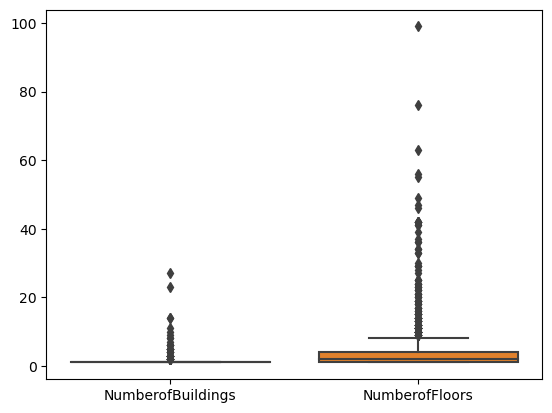

In [1496]:
sns.boxplot(data=data[["NumberofBuildings", "NumberofFloors"]])

NumberOfBuildings and NumberOfFloors shoulds not contain 0s

In [1473]:
data.loc[data["NumberofBuildings"] == 0, "NumberofBuildings"] = 1
data.loc[data["NumberofFloors"] == 0, "NumberofFloors"] = 1

<Axes: >

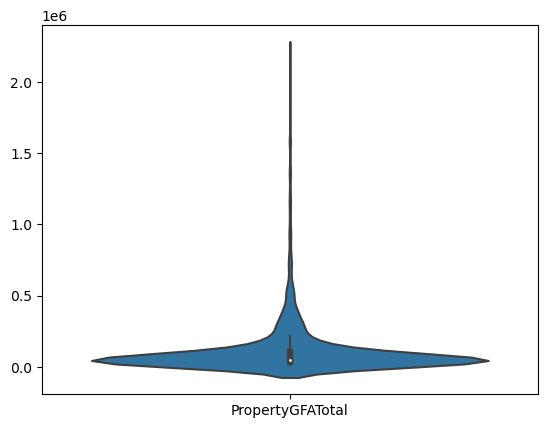

In [1498]:
sns.violinplot(data=data[["PropertyGFATotal"]])

In [1502]:
data.loc[data["PropertyGFATotal"] > 0.5e6].sort_values(by="PropertyGFATotal")

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ThirdLargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage),NumberOfYearsENERGYSTARCertified
3168,Nonresidential COS,Other,Magnuson,NORTHEAST,47.682120,-122.263300,1929,8.0,1,502030,...,NaN,NaN,18470340.0,Compliant,NaN,549.11,50.675212,0.000000,49.324782,0.00
1270,NonResidential,Large Office,Interurban Exchange IV/V & Van Vorst - SEDO,LAKE UNION,47.622960,-122.336200,2009,1.0,5,508160,...,Food Service,77.0,28053172.0,Compliant,NaN,487.53,77.443143,0.000000,22.556843,0.00
3317,NonResidential,Large Office,Dexter Station,MAGNOLIA / QUEEN ANNE,47.629060,-122.342590,2015,1.0,10,513816,...,Restaurant,NaN,18760766.0,Compliant,NaN,214.19,90.364695,0.000000,9.635294,817.75
488,NonResidential,Mixed Use Property,2200 Westlake - SEDO,DOWNTOWN,47.617830,-122.337290,2006,1.0,1,516407,...,Hotel,31.0,39403320.0,Compliant,NaN,734.72,74.696251,0.000000,25.303736,0.00
3162,NonResidential,Large Office,City Place V - SEDO,LAKE UNION,47.620370,-122.336270,2012,1.0,11,526423,...,Other,97.0,17463744.0,Compliant,NaN,163.19,94.856143,0.000000,5.143845,0.00
121,NonResidential,Retail Store,Northgate Mall,NORTH,47.707590,-122.325500,1951,1.0,1,530039,...,NaN,98.0,27717034.0,Compliant,NaN,723.47,58.536310,0.000000,41.463683,0.00
340,Campus,Other,Weintraub/Hutchinson/Thomas,LAKE UNION,47.628550,-122.330350,1997,1.0,5,535947,...,NaN,NaN,131373880.0,Compliant,NaN,3995.45,49.193530,0.000000,50.806465,0.00
3329,Nonresidential COS,Large Office,400 FAIRVIEW OFFICE BLDG,LAKE UNION,47.622510,-122.333900,2014,1.0,13,536697,...,Retail Store,98.0,13239050.0,Compliant,NaN,245.16,74.973423,0.000000,25.026562,0.00
2325,Campus,University,5th Avenue Master Meter,MAGNOLIA / QUEEN ANNE,47.650190,-122.361730,1945,14.0,2,537000,...,NaN,NaN,90609640.0,Compliant,NaN,3768.66,24.963235,0.000000,75.036760,0.00
507,NonResidential,Large Office,One Convention Place,DOWNTOWN,47.611500,-122.332780,2001,1.0,23,538933,...,NaN,90.0,16020642.0,Compliant,NaN,111.69,99.999988,0.000000,0.000000,817.75


In [1474]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'ComplianceStatus', 'Outlier', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
      dtype='object')

In [1475]:
missing_property_use_type = data.loc[
    data["LargestPropertyUseType"].isna(),
    "NumberofBuildings":"ThirdLargestPropertyUseTypeGFA",
]
missing_property_use_type

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
353,2.0,2,111445,0,111445,"Fitness Center/Health Club/Gym, Office, Other ...",NaN,NaN,NaN,NaN,NaN,NaN
1077,1.0,13,219874,0,219874,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
1147,1.0,8,61721,0,61721,Hotel,NaN,NaN,NaN,NaN,NaN,NaN
1483,1.0,5,45715,0,45715,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
1756,1.0,17,76855,0,76855,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
1768,NaN,4,29357,0,29357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2321,NaN,4,28472,0,28472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2336,1.0,4,20844,0,20844,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN
2414,1.0,4,48350,0,48350,Office,NaN,NaN,NaN,NaN,NaN,NaN
2459,1.0,3,28800,0,28800,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN


In [1476]:
data.loc[missing_property_use_type.index, "LargestPropertyUseType"] = data[
    "ListOfAllPropertyUseTypes"
]
data.loc[missing_property_use_type.index, "LargestPropertyUseTypeGFA"] = data[
    "PropertyGFATotal"
]

We can drop the two buildings with multiple property uses since we won't be able to fill in missing values

In [1477]:
data = data.drop(index=[353, 3040])

We can now check whether some totals are incoherent 

In [1478]:
data.loc[
    data["PropertyGFATotal"]
    != (data["PropertyGFAParking"] + data["PropertyGFABuilding(s)"])
]

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [1479]:
erroneous_energy_total = data.loc[
    abs(
        round(data["SiteEnergyUse(kBtu)"])
        - round(
            data["Electricity(kBtu)"]
            + data["NaturalGas(kBtu)"]
            + data["SteamUse(kBtu)"]
        )
    )
    > 100,
    "SiteEUI(kBtu/sf)":,
]
erroneous_energy_total

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
69,64.300003,64.500000,151.600006,152.100006,2.365898e+07,2.373692e+07,6093150.0,4.226010e+06,14419146.0,6886.799805,688680.0,Compliant,NaN,607.41,1.56
70,125.199997,125.900002,261.700012,265.399994,8.141156e+06,8.181881e+06,4120130.0,1.100268e+06,3754115.0,0.000000,0.0,Compliant,NaN,344.20,3.77
71,75.199997,76.300003,138.100006,140.000000,2.095503e+07,2.125784e+07,9763690.0,2.125535e+06,7252325.0,0.000000,0.0,Compliant,NaN,804.20,2.03
73,52.400002,51.599998,110.400002,109.500000,2.726369e+06,2.682243e+06,1202380.0,3.790589e+05,1293349.0,0.000000,0.0,Compliant,NaN,101.83,1.96
75,70.000000,70.300003,171.199997,175.199997,2.072325e+07,2.082352e+07,5137220.0,3.960342e+06,13512686.0,0.000000,0.0,Compliant,NaN,490.73,1.87
206,60.299999,62.400002,189.500000,195.899994,4.084775e+07,4.222740e+07,0.0,1.196941e+07,40839637.0,5382.505371,538251.0,Compliant,NaN,313.30,0.40
329,389.100006,385.600006,1026.599976,1001.000000,6.176238e+07,6.121474e+07,5650343.5,1.363676e+07,46528618.0,95718.156250,9571816.0,Compliant,NaN,1268.87,7.99
371,68.699997,68.699997,211.300003,211.300003,1.132551e+07,1.132551e+07,0.0,3.219974e+06,10986553.0,3366.104004,336610.0,Compliant,NaN,94.47,0.34
403,41.599998,42.200001,113.500000,113.500000,9.058916e+06,9.200102e+06,0.0,2.308732e+06,7877393.0,0.000000,0.0,Compliant,NaN,54.92,0.16
505,55.599998,58.500000,0.000000,0.000000,5.974994e+06,6.284896e+06,0.0,5.764793e+05,1966947.0,0.000000,0.0,Compliant,NaN,13.71,0.06


In [1480]:
len(erroneous_energy_total)

44

There are 44 buildings with erroneous energy use values, we will remove them

In [1481]:
data = data.drop(erroneous_energy_total.index)

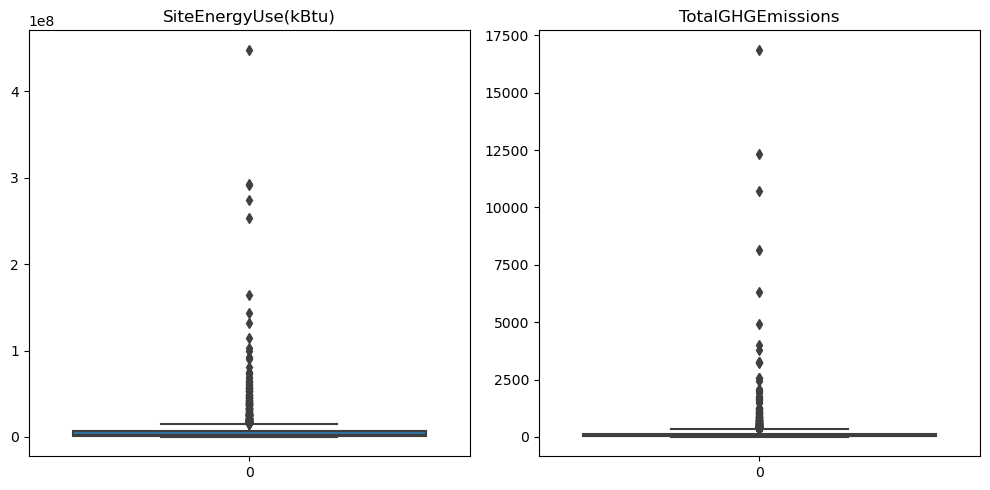

In [1488]:
fig, ax = plt.subplots(1, 2, figsize=[10, 5])
sns.boxplot(data=data["SiteEnergyUse(kBtu)"], ax=ax[0])
ax[0].set_title("SiteEnergyUse(kBtu)")
sns.boxplot(data=data["TotalGHGEmissions"], ax=ax[1])
ax[1].set_title("TotalGHGEmissions")
plt.tight_layout()
plt.show()

In [1489]:
energy_use_outliers = data.loc[
    data["SiteEnergyUse(kBtu)"] > 2e8,
    ["PropertyGFATotal", "BuildingType", "PrimaryPropertyType", "SiteEnergyUse(kBtu)"],
].sort_values(by="PropertyGFATotal")

energy_use_outliers

,PropertyGFATotal,BuildingType,PrimaryPropertyType,SiteEnergyUse(kBtu)
558,429405,NonResidential,Other,274682208.0
35,494835,Campus,Mixed Use Property,448385312.0
124,879000,NonResidential,Hospital,253832464.0
170,1158691,NonResidential,Hospital,293090784.0
618,1765970,NonResidential,Hospital,291614432.0


These outliers will be removed from the data set used for further analysis

In [1490]:
data_wo_outliers = data.copy()
data_wo_outliers.drop(energy_use_outliers.index, inplace=True)

## Feature Engineering

We will exploit some of the features to create new ones that can be exploited for further analyses

We can start by calculating the percentage of usage of each energy source:

In [1482]:
data["ElectricityUse(Percentage)"] = (
    data["Electricity(kBtu)"] / data["SiteEnergyUse(kBtu)"] * 100
)

data["SteamUse(Percentage)"] = (
    data["SteamUse(kBtu)"] / data["SiteEnergyUse(kBtu)"] * 100
)

data["NaturalGasUse(Percentage)"] = (
    data["NaturalGas(kBtu)"] / data["SiteEnergyUse(kBtu)"] * 100
)

In [1483]:
buildings_wo_energy_use = data.loc[
    data["SteamUse(Percentage)"].isna()
    | data["ElectricityUse(Percentage)"].isna()
    | data["NaturalGasUse(Percentage)"].isna()
]

buildings_wo_energy_use

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage)
1361,SPS-District K-12,K-12 School,Olympic Hills Elementary,NORTH,47.72369,-122.30676,1954,1.0,1,42292,...,0.0,0.0,0.0,Error - Correct Default Data,NaN,0.0,0.0,NaN,NaN,NaN
1768,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,SOUTHWEST,47.54731,-122.38656,1992,NaN,4,29357,...,NaN,NaN,NaN,Compliant,NaN,NaN,NaN,NaN,NaN,NaN
2321,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,NORTHEAST,47.67025,-122.31232,1963,NaN,4,28472,...,NaN,NaN,NaN,Compliant,NaN,NaN,NaN,NaN,NaN,NaN
2480,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,SOUTHWEST,47.58968,-122.38587,1969,NaN,3,30420,...,NaN,NaN,NaN,Compliant,NaN,NaN,NaN,NaN,NaN,NaN
3348,Multifamily LR (1-4),Low-Rise Multifamily,STREAM FIFTEEN,EAST,47.62441,-122.31300,2015,1.0,4,36685,...,NaN,NaN,NaN,Compliant,NaN,NaN,NaN,NaN,NaN,NaN


These 5 buildings seem to have incorrect data, we will therefore drop them

In [1484]:
data = data.drop(buildings_wo_energy_use.index)

We can add a feature to count the number of years a building has obtained the EnergyStar Certification

In [1485]:
data["NumberOfYearsENERGYSTARCertified"] = len(data["YearsENERGYSTARCertified"]) / 4

data.loc[
    data["YearsENERGYSTARCertified"].isnull(), "NumberOfYearsENERGYSTARCertified"
] = 0

In [1486]:
data = data.drop(
    columns=[
        "SteamUse(kBtu)",
        "Electricity(kWh)",
        "Electricity(kBtu)",
        "NaturalGas(therms)",
        "NaturalGas(kBtu)",
        "SiteEUI(kBtu/sf)",
        "SiteEUIWN(kBtu/sf)",
        "SourceEUI(kBtu/sf)",
        "SourceEUIWN(kBtu/sf)",
        "YearsENERGYSTARCertified",
    ]
)

data

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,ThirdLargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,ElectricityUse(Percentage),SteamUse(Percentage),NaturalGasUse(Percentage),NumberOfYearsENERGYSTARCertified
0,NonResidential,Hotel,Mayflower park hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,NaN,60.0,7.226362e+06,Compliant,NaN,249.98,54.605993,27.730162,17.663838,0.0
1,NonResidential,Hotel,Paramount Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,Restaurant,61.0,8.387933e+06,Compliant,NaN,295.86,38.660907,0.000000,61.339093,0.0
2,NonResidential,Hotel,5673-The Westin Seattle,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,NaN,43.0,7.258702e+07,Compliant,NaN,2089.28,68.230741,29.711308,2.057944,0.0
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,NaN,56.0,6.794584e+06,Compliant,NaN,286.43,40.751928,32.591344,26.656717,0.0
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,Swimming Pool,75.0,1.417261e+07,Compliant,NaN,505.01,37.880168,0.000000,62.119825,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Nonresidential COS,Office,Horticulture building,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,...,NaN,46.0,8.497457e+05,Error - Correct Default Data,NaN,20.94,61.697384,0.000000,38.302639,0.0
3372,Nonresidential COS,Other,International district/Chinatown CC,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,NaN,NaN,9.502762e+05,Compliant,NaN,32.17,41.729558,0.000000,58.270426,0.0
3373,Nonresidential COS,Other,Queen Anne Pool,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,Swimming Pool,NaN,5.765898e+06,Compliant,NaN,223.54,31.082041,0.000000,68.917956,0.0
3374,Nonresidential COS,Mixed Use Property,South Park Community Center,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,Pre-school/Daycare,NaN,7.194712e+05,Compliant,NaN,22.11,48.489805,0.000000,51.510194,0.0


Since we aim to predict the energy use and GHG emissions of non residential buildings, we can filter out the residential ones:

In [ ]:
data = data[~data["BuildingType"].str.contains("Multifamily")]

## Analysis

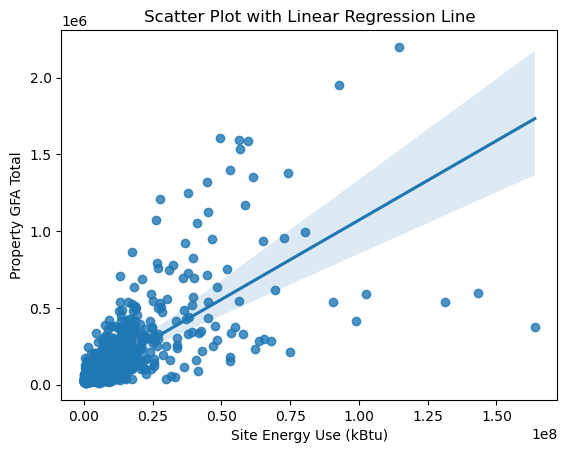

In [1492]:
sns.regplot(x="SiteEnergyUse(kBtu)", y="PropertyGFATotal", data=data_wo_outliers)

plt.xlabel("Site Energy Use (kBtu)")
plt.ylabel("Property GFA Total")
plt.title("Scatter Plot with Linear Regression Line")
plt.show()

In [1493]:
test_data = data.copy()

gfa_to_drop = test_data.loc[test_data["PropertyGFATotal"] > 1e6]
test_data.drop(gfa_to_drop.index, inplace=True)
energy_to_drop = test_data.loc[test_data["SiteEnergyUse(kBtu)"] > 1e8]
test_data.drop(energy_to_drop.index, inplace=True)

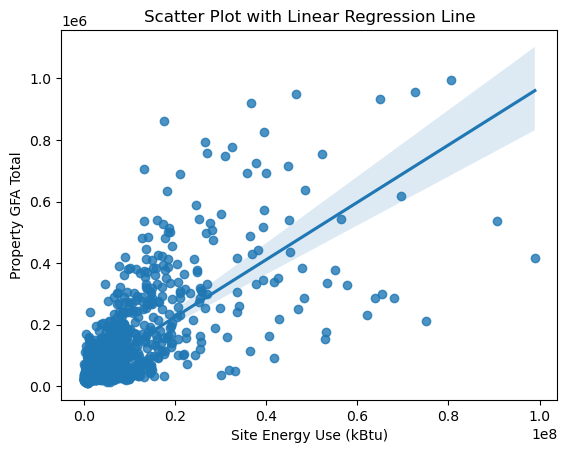

In [1494]:
sns.regplot(x="SiteEnergyUse(kBtu)", y="PropertyGFATotal", data=test_data)

plt.xlabel("Site Energy Use (kBtu)")
plt.ylabel("Property GFA Total")
plt.title("Scatter Plot with Linear Regression Line")
plt.show()